#  Atividade prática aula 05 <h1>
    Aluno: Kristtopher Kayo Coelho \par
    Matrícula: ES95031

A tarefa consiste em desenvolver um script que execute o teste Kolmogorov-Smirnov para verificar se as amostras com menos de 30 elementos seguem distribuição Normal. A quantidade de elementos __N__, da população (data1.txt), é de 56 elementos, os quais fazem referencia às vazões médias anuais (1944 - 1999) do Rio Paraopeba em Ponte Nova do Paraopeba em $m^3/s$.
A média da população ($\bar{x}$) é 81.00 $m^3/s$ com desvio padrão ($S$) de 26.41 $m^3/s$.

# Importando Bibliotecas

In [139]:
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

## Função de análise do intervalo de confiança por Kolmogorov–Smirnov

Nesta função é apresentado os valores referentes a média ($\mu$), desvio padrão ($\sigma$) de cada amostras. Ainda é avaliado se a hipótese de normalidade é aceita ou não para o limiar de _p-value_ igual a 0.8.

In [140]:
def kolmogorov_smirnov_analysis(sample, mean, std, ks_p_valor):
    print('A média (\u03BC) das amostras é = {:0.4f}.'.format(mean))
    print('O desvio padrão (\u03C3) das amostras é = {:0.4f}.'.format(std))
    print('\n')
    
    if (ks_p_valor >= 0.8):
        print('As amostras seguem distribuição Normal com p-value igual {:0.4f}.'.format(ks_p_valor))
    else:
        print('As amostras NÃO seguem distribuição Normal com p-value igual {:0.4f}.'.format(ks_p_valor))
    print('\nOu seja, existe {:0.2f}% de chance de constatação da hipótese H0.'.format((ks_p_valor)*100))
       
    ax = sns.distplot(sample, axlabel = 'Vazão $m^3/s$', label = 'PDF')
    ax.set(ylabel= 'F(x)')

# Preparando Amostras

Nesta seção são preparadas as amostras para avaliação. São extraído da população, duas amostra contendo 20 elementos cada. Os ementos representam o volume das vazões médias anuais. Eles são escolhidos aleatóriamente por meio da função __sample = np.random.choice(vol,20)__.

In [141]:
#fonte das amostras http://www.cprm.gov.br/publique/media/hidrologia/mapas_publicacoes/livro_hidrologia_estatistica/cap7-test_hip.pdf
arq = open('data1.txt','r')
lines = []
vol = []
date = []
count = 0
n0_samples = []
n0_mean 
n0_std
n0_ks_stat
n0_ks_p_valor
n1_samples = []
n1_mean 
n1_std
n1_ks_stat
n1_ks_p_valor
samples_qtd = 20
x = arq.readlines()

for l in x:
    date.append(int(l.split(',')[0]))
    vol.append(float(l.split(',')[1]))

while True:
    # 20 amostras aleatoria das vazões médias anuais
    sample = np.random.choice(vol,samples_qtd)
    #média e desvio padrão
    mean = np.mean(sample)
    std = np.std(sample, ddof=1)
    # cálculo do Kolmogorov–Smirnov para cada amostra
    ks_stat, ks_p_valor = stats.kstest(sample, cdf = 'norm', args = (mean,std), N = len(sample))
    #amostra A
    if(ks_p_valor >= 0.8) and (count == 0):
        count += 1
        n0_samples = sample
        n0_mean = mean
        n0_std = std
        n0_ks_stat = ks_stat
        n0_ks_p_valor = ks_p_valor
    #amostra B
    elif(ks_p_valor >= 0.8) and (count == 1):
        count += 1
        n1_samples = sample
        n1_mean = mean
        n1_std = std
        n1_ks_stat = ks_stat
        n1_ks_p_valor = ks_p_valor
        break

# Verificando se as amostras escolhidas aleatóriamente seguem a distribuição normal

## Análise da amostra A

A média (μ) das amostras é = 83.9500.
O desvio padrão (σ) das amostras é = 19.4312.


As amostras seguem distribuição Normal com p-value igual 0.9337.

Ou seja, existe 93.37% de chance de constatação da hipótese H0.


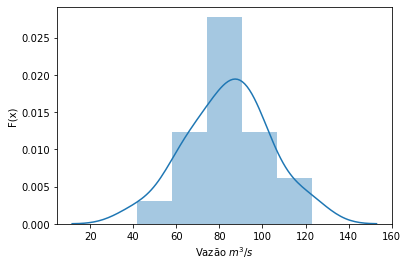

In [142]:
kolmogorov_smirnov_analysis(n0_samples, n0_mean, n0_std, n0_ks_p_valor)

## Análise da amostra B

A média (μ) das amostras é = 78.2850.
O desvio padrão (σ) das amostras é = 21.0047.


As amostras seguem distribuição Normal com p-value igual 0.9960.

Ou seja, existe 99.60% de chance de constatação da hipótese H0.


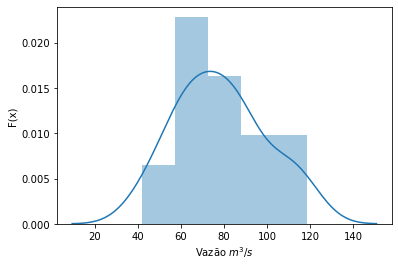

In [143]:
kolmogorov_smirnov_analysis(n1_samples, n1_mean, n1_std, n1_ks_p_valor)

# Verificando se as médias das amostras possuem diferença significativa (Teste-T)
Válido para as duas amostras fixas, acima apresentadas.

In [144]:
t, p = stats.ttest_ind(n0_samples, n1_samples)
print('Existem apenas {:0.2f}% de chances da diferença ser ao acaso H0.'.format(p*100))

Existem apenas 38.15% de chances da diferença ser ao acaso H0.


# Calculando o intervalo de confiança para as médias para diferentes níveis de confiança

In [145]:
def confidence_interval_analysis(A_min, A_max, n0_mean, B_min, B_max, n1_mean, interval):
    if((n1_mean >= A_min) and (n1_mean <= A_max)) and ((n0_mean >= B_min) and (n0_mean <= B_max)):
        print('As Amostras não são diferentes neste nível de confiança de {:0.1f}%.'.format(interval*100))
        return
    elif(((n0_mean > n1_mean) and (A_min > B_max)) or((n1_mean > n0_mean) and (B_min > A_max))) :
        print('As Amostras são diferentes neste nível de confiança de {:0.1f}%.'.format(interval*100))
    else:
        print ('Inconclusivo pata o T-student, o teste T é necessário nível de confiança de {:0.1f}%.'.format(interval*100))

In [146]:
def confidence_interval(interval, mean, std, n):
    t = stats.t.ppf((interval + 1)/2, n)
    return (mean - t*(std/(math.sqrt(n)))), (mean + t*(std/(math.sqrt(n))))

In [147]:
def graph(n0_mean, n1_mean, n0_interval, n1_interval):
    x = [0, 1]
    y =  [n0_mean, n1_mean]
    error = [n0_interval, n1_interval]
    labels = ['Amostra A', 'Amostra B']
    
    fig, ax = plt.subplots()
    ax.bar(x, y,
           yerr=error,
           align='center',
           alpha=0.5,
           ecolor='black',
           capsize=10)
    ax.set_ylabel('Média')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_title('Vazões médias anuais do Rio Paraopeba em $m^3/s$')

## 90\%

Intervalo de confiança da amostra A: 76.46, 91.44 e média 83.95.
Intervalo de confiança da amostra B: 70.18, 86.39 e média 78.28.

As Amostras não são diferentes neste nível de confiança de 90.0%.


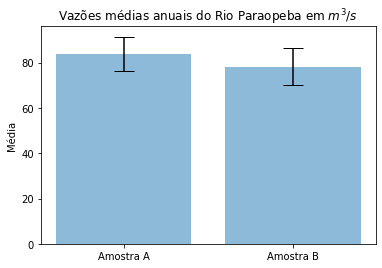

In [148]:
A_min, A_max = confidence_interval(0.9, n0_mean, n0_std, len(n0_samples))
B_min, B_max = confidence_interval(0.9, n1_mean, n1_std, len(n1_samples))

print('Intervalo de confiança da amostra A: {:0.2f}, {:0.2f} e média {:0.2f}.'.format(A_min, A_max, n0_mean))
print('Intervalo de confiança da amostra B: {:0.2f}, {:0.2f} e média {:0.2f}.\n'.format(B_min, B_max, n1_mean))

confidence_interval_analysis(A_min, A_max, n0_mean, B_min, B_max, n1_mean, 0.9)

graph(n0_mean, n1_mean, n0_mean - A_min, n1_mean - B_min)

## 95\%

Intervalo de confiança da amostra A: 74.89, 93.01 e média 83.95.
Intervalo de confiança da amostra B: 68.49, 88.08 e média 78.28.

As Amostras não são diferentes neste nível de confiança de 95.0%.


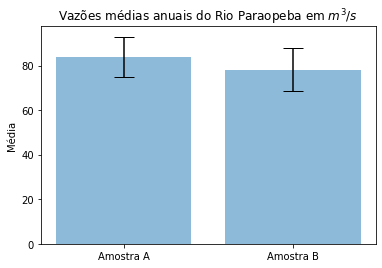

In [149]:
A_min, A_max = confidence_interval(0.95, n0_mean, n0_std, len(n0_samples))
B_min, B_max = confidence_interval(0.95, n1_mean, n1_std, len(n1_samples))

print('Intervalo de confiança da amostra A: {:0.2f}, {:0.2f} e média {:0.2f}.'.format(A_min, A_max, n0_mean))
print('Intervalo de confiança da amostra B: {:0.2f}, {:0.2f} e média {:0.2f}.\n'.format(B_min, B_max, n1_mean))

confidence_interval_analysis(A_min, A_max, n0_mean, B_min, B_max, n1_mean, 0.95)

graph(n0_mean, n1_mean, n0_mean - A_min, n1_mean - B_min)

## 99\%

Intervalo de confiança da amostra A: 71.59, 96.31 e média 83.95.
Intervalo de confiança da amostra B: 64.92, 91.65 e média 78.28.

As Amostras não são diferentes neste nível de confiança de 99.0%.


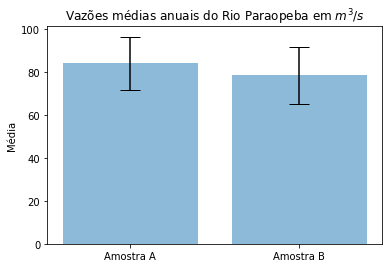

In [150]:
A_min, A_max = confidence_interval(0.99, n0_mean, n0_std, len(n0_samples))
B_min, B_max = confidence_interval(0.99, n1_mean, n1_std, len(n1_samples))

print('Intervalo de confiança da amostra A: {:0.2f}, {:0.2f} e média {:0.2f}.'.format(A_min, A_max, n0_mean))
print('Intervalo de confiança da amostra B: {:0.2f}, {:0.2f} e média {:0.2f}.\n'.format(B_min, B_max, n1_mean))

confidence_interval_analysis(A_min, A_max, n0_mean, B_min, B_max, n1_mean, 0.99)

graph(n0_mean, n1_mean, n0_mean - A_min, n1_mean - B_min)

# Conclusões

O teste pareado apresenta resultados que confirmam o que foi obtido com o teste T-student. Assim comprova-se a hipotese nula ($H_0$), ou seja, não há diferença significativa entre a distribuição amostral e a distribuição normal. Porém para cada intervalo de confiança é necessário uma avaliação criteriosa, uma vez que, para algum intervalo essa informação pode não ser comprovada.